In [1]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# Image Augmentation

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img,img_to_array,load_img

#create an image instance of the ImageDataGenerator
train_datagen=ImageDataGenerator(rotation_range=40,
                                 width_shift_range=0.25,
                                 height_shift_range=0.25,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 rescale=1./255,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

#Train data fetching from the directory of images
batch_size=16
train_data=train_datagen.flow_from_directory('C:/Users/user/AIML/DL handson/cnn_data/train',
                                             target_size=(150,150),batch_size=batch_size,class_mode='binary')



Found 1200 images belonging to 2 classes.


In [5]:
test_data = test_datagen.flow_from_directory(
    'C:/Users/user/AIML/DL handson/cnn_data/test',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)


Found 408 images belonging to 2 classes.


# Build a CNN model

In [6]:
model=Sequential()

#1st convolution layer
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#2nd convolution layer
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#3rd convolution layer
model.add(Conv2D(32,(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
#converting multi dimension to 1 d array
model.add(Flatten())
model.add(Dense(units=150,activation='relu'))
model.add(Dropout(0.2))
#output layer
model.add(Dense(units=1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

# Compile the cnn model

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Run the CNN Model

In [8]:
result=model.fit(train_data,
                 steps_per_epoch=48//batch_size,epochs=30,
                 validation_data=test_data,
                 validation_steps=48//batch_size
                )

Epoch 1/30
3/3 [==============================] - 5s 987ms/step - loss: 1.3174 - accuracy: 0.4167 - val_loss: 0.6962 - val_accuracy: 0.4583
Epoch 2/30
3/3 [==============================] - 2s 773ms/step - loss: 0.8687 - accuracy: 0.3542 - val_loss: 1.2594 - val_accuracy: 0.5208
Epoch 3/30
3/3 [==============================] - 2s 680ms/step - loss: 1.1677 - accuracy: 0.4167 - val_loss: 0.9970 - val_accuracy: 0.5625
Epoch 4/30
3/3 [==============================] - 2s 707ms/step - loss: 0.9051 - accuracy: 0.4792 - val_loss: 0.7287 - val_accuracy: 0.4375
Epoch 5/30
3/3 [==============================] - 2s 692ms/step - loss: 0.7199 - accuracy: 0.6250 - val_loss: 0.7380 - val_accuracy: 0.5208
Epoch 6/30
3/3 [==============================] - 2s 733ms/step - loss: 0.7062 - accuracy: 0.5417 - val_loss: 0.7255 - val_accuracy: 0.4583
Epoch 7/30
3/3 [==============================] - 2s 682ms/step - loss: 0.7201 - accuracy: 0.4583 - val_loss: 0.7182 - val_accuracy: 0.4792
Epoch 8/30
3/3 [====

# Plot for Train & Test Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


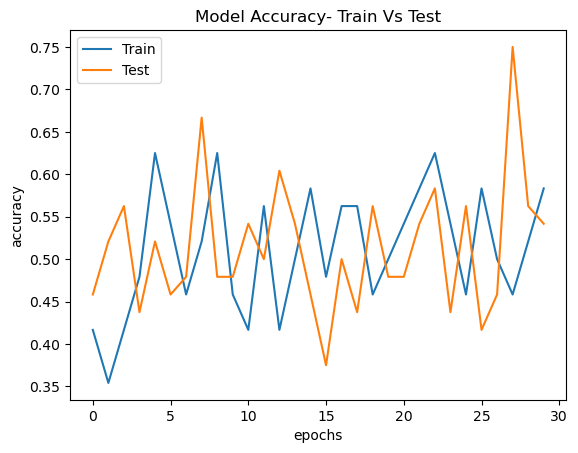

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()



# Run Inference on new image

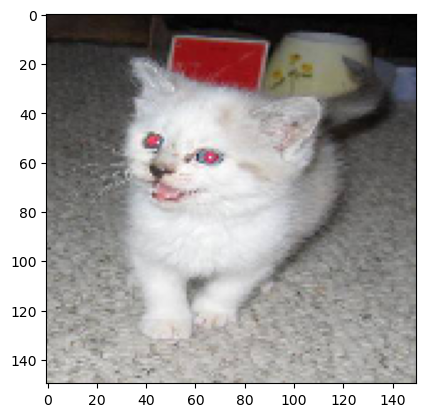

In [11]:
img=load_img('C:/Users/user/AIML/DL handson/cat.4018.jpg',
             target_size=(150,150))
plt.imshow(img)

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

# Assuming 'img' is your image loaded using load_img
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(preprocess_input(img_array))  # Assuming you want to preprocess input based on the model's requirements

score = float(predictions[0])
print(f"This image is {100*(1-score):.2f}% cat and {100 * score:.2f}% dog")


1/1 [==============================] - 0s 328ms/step
This image is 81.99% cat and 18.01% dog


In [14]:
from keras.preprocessing import image
import numpy as np
unseen=image.img_to_array(img)
unseen=np.expand_dims(unseen,axis=0)
result=model.predict(unseen)


1/1 [==============================] - 0s 63ms/step
